In [55]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [56]:
movies = pd.read_csv(
    "https://data-bootcamp-ztc.s3.amazonaws.com/movies_complete_cleaned.csv"
)

awards = pd.read_csv(
    "https://data-bootcamp-ztc.s3.amazonaws.com/parsed_awards_table.csv"
)

movies_sel = movies[["name", "plot"]]

awards_sel = awards[["name", "oscar wins and nominations"]]

df = pd.merge(movies_sel, awards_sel, how="right", on="name")

df["oscar_nom"] = [1 if x != 0 else 0 for x in df["oscar wins and nominations"]]

df = df[["name", "plot", "oscar_nom"]]

df["plot"].fillna("", inplace=True)

df.head()

,name,plot,oscar_nom
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",1
1,Sleight,A young street magician (Jacob Latimore) is le...,0
2,Silence,The story of two Catholic missionaries (Andrew...,1
3,Manchester by the Sea,"Lee Chandler is a brooding, irritable loner wh...",1
4,Dirty Grandpa,"Jason Kelly, the grandson of Dick Kelly, loses...",0


<IPython.core.display.Javascript object>

## Cleaning the text

Remove punctuation

In [57]:
import string


def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)


df["plot"] = [remove_punct(x) for x in df["plot"]]

<IPython.core.display.Javascript object>

Remove stopwords

In [58]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)


df["plot"] = [remove_stopwords(x) for x in df["plot"]]

<IPython.core.display.Javascript object>

Stemming. Bundling together words of same root.


In [59]:
# from nltk.stem.porter import PorterStemmer

# stemmer = PorterStemmer()


# def stemming(text):
#     text = [stemmer.stem(word) for word in text.split()]

#     return " ".join(text)


# df["plot"] = [stemming(x) for x in df["plot"]]

<IPython.core.display.Javascript object>

#### Tokenization

In [60]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df["tokens"] = df["plot"].map(tokenizer.tokenize)

df[["plot", "tokens"]].head(10)

,plot,tokens
0,marvels doctor strange follows story talented ...,"[marvels, doctor, strange, follows, story, tal..."
1,young street magician jacob latimore left care...,"[young, street, magician, jacob, latimore, lef..."
2,story two catholic missionaries andrew garfiel...,"[story, two, catholic, missionaries, andrew, g..."
3,lee chandler brooding irritable loner works ha...,"[lee, chandler, brooding, irritable, loner, wo..."
4,jason kelly grandson dick kelly loses grandmot...,"[jason, kelly, grandson, dick, kelly, loses, g..."
5,,[]
6,movie portrait one important tragic moments am...,"[movie, portrait, one, important, tragic, mome..."
7,national manhunt ordered rebellious kid foster...,"[national, manhunt, ordered, rebellious, kid, ..."
8,rural england 1865 katherine stifled loveless ...,"[rural, england, 1865, katherine, stifled, lov..."
9,rocky young woman wanting start better life si...,"[rocky, young, woman, wanting, start, better, ..."


<IPython.core.display.Javascript object>

## TF IDF

Downweighting frequently occuring words in the feature vectors. Frequently occuring words typically don't contain useful information therefore TF - IDF is great for assessing word relevancy.

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer


def tfidf(data, ngrams=(1, 1)):
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngrams)
    train = tfidf_vectorizer.fit_transform(data)
    return train


X_train_tfidf = tfidf(df["plot"])

print(X_train_tfidf.shape)
print([x for x in X_train_tfidf.todense()[0][0:].tolist()[0] if x != 0])


(6256, 34876)
[0.13209349307215396, 0.09998789127898605, 0.11070723790277437, 0.15810319302318845, 0.17283510357018544, 0.1689601042326595, 0.1433712824761914, 0.09541153688976615, 0.11471980182598308, 0.09279723157672788, 0.17283510357018544, 0.12972954187544986, 0.18369201477965652, 0.3274945364572547, 0.1423343131942321, 0.09801244673620638, 0.17757771946663126, 0.11417480647059823, 0.18369201477965652, 0.09776240086050933, 0.1214881073342098, 0.18369201477965652, 0.17283510357018544, 0.1923096300136283, 0.13909266163724518, 0.18369201477965652, 0.18369201477965652, 0.057591342797369965, 0.10358864611097897, 0.09839311937744659, 0.09183536362481674, 0.11047992392536639, 0.14134559286441048, 0.07258774667782177, 0.3197018225154413, 0.12710229359003125, 0.1214881073342098, 0.13338198782564017, 0.1923096300136283, 0.15095192842820385, 0.1111692920629914, 0.13519132601662598, 0.0830304903135123]


<IPython.core.display.Javascript object>

### hashing then transform
source: https://stackoverflow.com/questions/54745482/what-is-the-difference-between-tfidf-vectorizer-and-tfidf-transformer

In [64]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv = HashingVectorizer()
X_train_counts = cv.fit_transform(df["plot"])
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_hashed = tf_transformer.transform(X_train_counts)
print(X_train_hashed)

  (0, 1019414)	-0.0928251752595355
  (0, 1009665)	-0.18374732926811788
  (0, 995898)	-0.1105131923310971
  (0, 983378)	0.10001800025821993
  (0, 979472)	0.18374732926811788
  (0, 976640)	-0.09804196085722336
  (0, 965118)	-0.14237717379290474
  (0, 877251)	-0.15815080204558757
  (0, 771159)	-0.1776311927802438
  (0, 766433)	-0.17288714875763478
  (0, 764247)	-0.0726096047541288
  (0, 745451)	-0.13913454608952486
  (0, 724631)	-0.15099738401707785
  (0, 720710)	0.31979809312793267
  (0, 703726)	-0.1297686068465417
  (0, 686826)	-0.0954402678085418
  (0, 681351)	0.05760868506273986
  (0, 654798)	0.17288714875763478
  (0, 639749)	-0.13523203567432118
  (0, 628860)	-0.18374732926811788
  (0, 582700)	-0.19236753949229105
  (0, 574181)	0.11074057475871177
  (0, 565760)	0.09842274812899038
  (0, 551567)	0.11475434697026715
  (0, 550563)	-0.16901098255607067
  :	:
  (6255, 458613)	0.09692089807210025
  (6255, 453602)	0.09356124633788845
  (6255, 447656)	-0.07589694703392917
  (6255, 416002)	0.

<IPython.core.display.Javascript object>

Test to see if TfidfVectorizer worked as expected

#### Visualizing the embeddings


In [22]:
X_tfidf = train_tfidf
y = df["oscar_nom"].values

<IPython.core.display.Javascript object>

Dimensionality reduction using truncated SVD (aka LSA).

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). 

Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

In [23]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label: idx for idx, label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ["orange", "blue", "blue"]
    if plot:
        plt.scatter(
            lsa_scores[:, 0],
            lsa_scores[:, 1],
            s=8,
            alpha=0.8,
            c=test_labels,
            cmap=matplotlib.colors.ListedColormap(colors),
        )
        red_patch = mpatches.Patch(color="orange", label="no oscar nomination")
        green_patch = mpatches.Patch(color="blue", label="oscar nomination")
        plt.legend(handles=[red_patch, green_patch], prop={"size": 16})


<IPython.core.display.Javascript object>

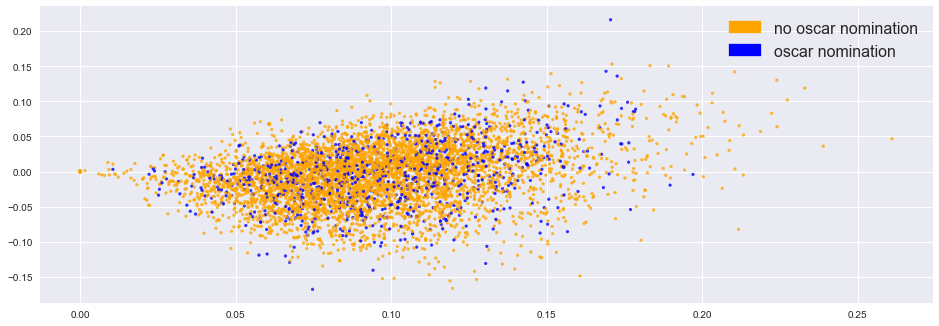

<IPython.core.display.Javascript object>

In [24]:
plt.figure(1, figsize=(16, 12))
plt.subplot(2, 1, 1)
# plot_LSA(X_counts, y)
# plt.subplot(2, 1, 2)
plot_LSA(X_tfidf, y)

TF IDF in this situation has better linearly separable classes.

### Basic Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

<IPython.core.display.Javascript object>

#### With TfidfVectorizer

In [112]:
X = X_train_tfidf
y = df["oscar_nom"].values.reshape(-1, 1)

X_train_tfidf, X_test, y_train_tfidf, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

model = LogisticRegression(class_weight="balanced")
model.fit(X_train_tfidf, y_train_tfidf)

y_pred = model.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [5004, 6256]

<IPython.core.display.Javascript object>

#### With hashed vector and tf id transformer

In [113]:
X = X_train_hashed
y = df["oscar_nom"].values.reshape(-1, 1)

X_train_tfidf, X_test, y_train_tfidf, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

model = LogisticRegression(class_weight="balanced")
model.fit(X_train_tfidf, y_train_tfidf)

y_pred = model.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)


/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1062
           1       0.28      0.23      0.25       190

    accuracy                           0.79      1252
   macro avg       0.57      0.56      0.57      1252
weighted avg       0.78      0.79      0.78      1252



array([[947, 115],
       [146,  44]])

<IPython.core.display.Javascript object>

In [110]:
X = X_train_tfidf
y = df["oscar_nom"].values.reshape(-1, 1)

X_train_tfidf, X_test, y_train_tfidf, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

model = LogisticRegression(class_weight="balanced")
model.fit(X_train_tfidf, y_train_tfidf)

y_pred = model.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)


/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1062
           1       0.00      0.00      0.00       190

    accuracy                           0.85      1252
   macro avg       0.42      0.50      0.46      1252
weighted avg       0.72      0.85      0.78      1252



/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[1062,    0],
       [ 190,    0]])

<IPython.core.display.Javascript object>